In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler

In [79]:

pf=pd.read_csv('diabetes2.csv')

Task1: Explore the dataset to understand its structure and contents.

In [80]:
pf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
pf.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [82]:
pf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Task 2: Perform any necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.

In [83]:
#For numerical columns, mean or median is utilized for value replacement in data cleaning, 
#while for categorical data like gender (e.g., men, women), mode can be employed.


pf['Glucose'].mean()

120.89453125

In [84]:
pf['Glucose'].median()

117.0

In [85]:
#Replace 0 values accept pregnency with mean
pf['Glucose']=pf['Glucose'].replace(0,pf['Glucose'].mean())
pf['BMI']=pf['BMI'].replace(0,pf['BMI'].mean())
pf['BloodPressure']=pf['BloodPressure'].replace(0,pf['BloodPressure'].mean())
pf['SkinThickness']=pf['SkinThickness'].replace(0,pf['SkinThickness'].mean())
pf['Insulin']=pf['Insulin'].replace(0,pf['Insulin'].mean())

In [86]:
pf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
#Check how many diabetics and non diabetics
pf['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

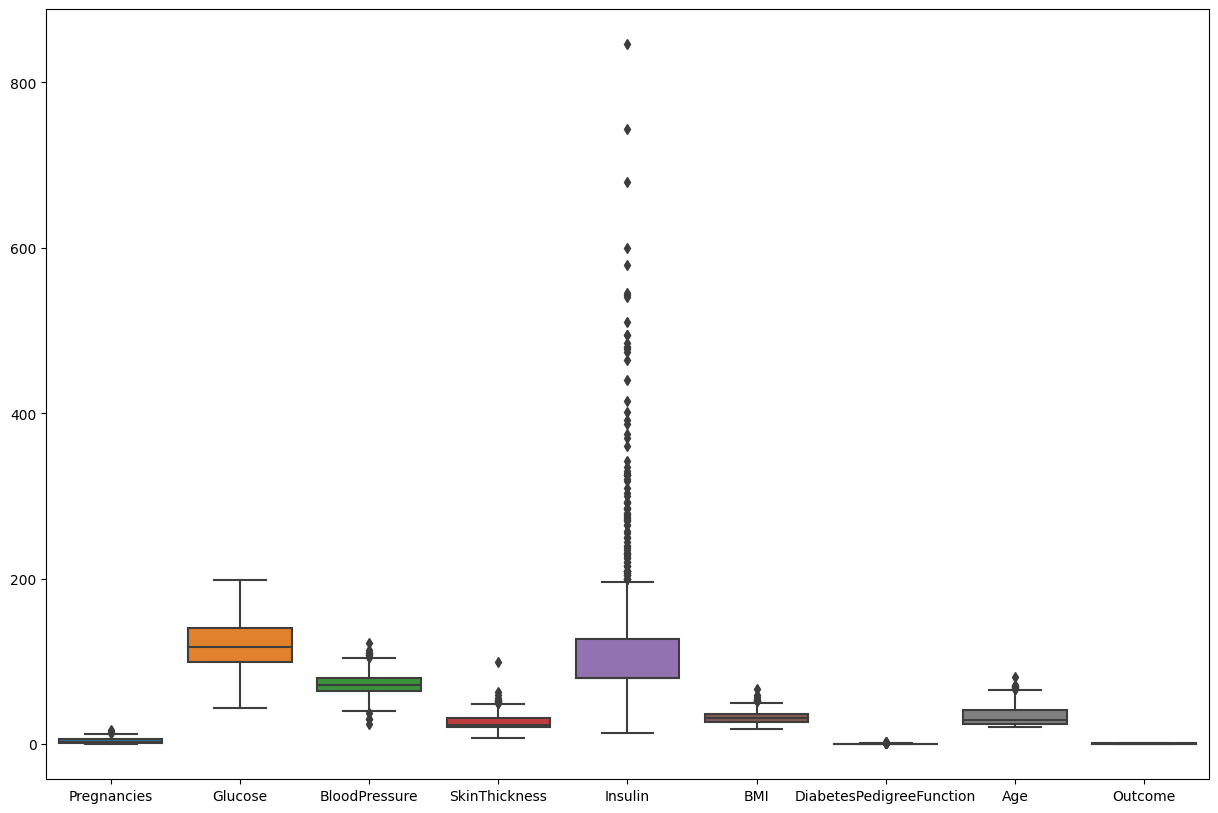

In [88]:

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=pf, ax=ax)
plt.show()

In [89]:
x=pf.drop(columns=['Outcome'])
y=pf['Outcome']

Task 3: Split the dataset into training and testing sets (e.g., 80% training and 20% testing).

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


In [92]:
x_tr=scale.fit_transform(x_train)
x_ts=scale.fit_transform(x_test)

Task 4: Build a Logistic Regression model to predict the likelihood of diabetes based on the features provided.

In [93]:
clf1 = LogisticRegression()
clf1.fit(x_tr,y_train)

LogisticRegression()

In [94]:
y_pred=clf1.predict(x_ts)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [95]:
#The first value represents "no," while the second value indicates "yes."
clf1.predict_proba(x_ts)

array([[0.76389005, 0.23610995],
       [0.83457028, 0.16542972],
       [0.89651979, 0.10348021],
       [0.86346907, 0.13653093],
       [0.59337723, 0.40662277],
       [0.61859519, 0.38140481],
       [0.98677452, 0.01322548],
       [0.6123945 , 0.3876055 ],
       [0.48117693, 0.51882307],
       [0.27969574, 0.72030426],
       [0.80429241, 0.19570759],
       [0.13617559, 0.86382441],
       [0.69154126, 0.30845874],
       [0.71967263, 0.28032737],
       [0.92104832, 0.07895168],
       [0.63090248, 0.36909752],
       [0.88513158, 0.11486842],
       [0.93145929, 0.06854071],
       [0.31169911, 0.68830089],
       [0.41998752, 0.58001248],
       [0.83727318, 0.16272682],
       [0.92963858, 0.07036142],
       [0.55092808, 0.44907192],
       [0.90867971, 0.09132029],
       [0.48856136, 0.51143864],
       [0.13412718, 0.86587282],
       [0.90297917, 0.09702083],
       [0.9739762 , 0.0260238 ],
       [0.74551068, 0.25448932],
       [0.89780675, 0.10219325],
       [0.

Task 5: Evaluate the model using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [96]:
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)


confusion_matrix [[85 14]
 [21 34]]
accuracy_score 0.7727272727272727
precision_score 0.7083333333333334
recall_score 0.6181818181818182
f1_score 0.6601941747572815
ROC AUC Score: 0.7383838383838384


In [97]:
#The confusion matrix shows 85 true negatives, 14 false positives, 21 false negatives, and 34 true positives.
#The accuracy score is 0.773, indicating the overall correctness of predictions.
#Precision score is 0.708, representing the proportion of true positive predictions among all positive predictions.
#Recall score is 0.618, denoting the proportion of actual positives that were correctly predicted.
#F1 score, a harmonic mean of precision and recall, is 0.660.
#The ROC AUC score, representing the model's ability to distinguish between classes, is 0.738.

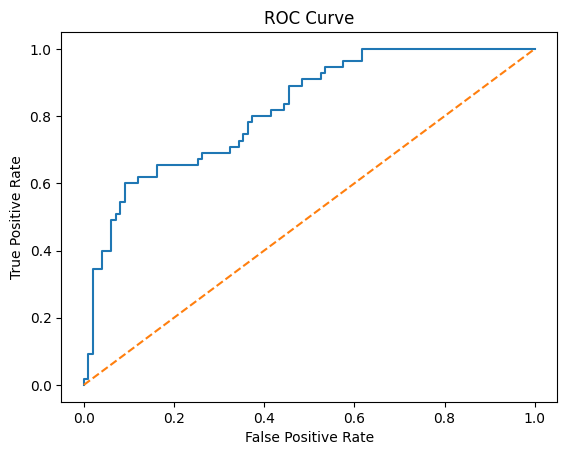

In [98]:
# Plot ROC curve
y_prob = clf1.predict_proba(x_ts)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Task 6: Interpret the model coefficients to understand the impact of different features on the likelihood of diabetes.

In [99]:
coefficients = clf1.coef_
intercept = clf1.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: [-0.87387862]
Coefficients: [[ 0.22192395  1.12487346 -0.16824905  0.01648627 -0.18588227  0.7313578
   0.21171528  0.39300256]]


The intercept is -0.87387862, and there are coefficients associated with each feature


In [100]:
# deploy the logistic regression model to a pickle file
import pickle
    
with open('logistic_regression_model.pkl', 'wb') as myfile:
    pickle.dump((scale, clf1), myfile)    

In [101]:
# Loading data in to pickle file
with open('y_test.pkl', 'wb') as myfile:
    pickle.dump(y_test, myfile)